In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import cPickle as pickle

from hlt import *

import MyBot

/Users/maximefournes/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
with open('dumps/gameMap50.p','rb') as f:
    myID,gameMap = pickle.load(f)

In [8]:
def plot_squares(locs,height,width,res=2):
    im = np.zeros((height*res,width*res))
    for loc in locs:
        im[loc.y*res:loc.y*res+res,loc.x*res:loc.x*res+res]=1
    plt.imshow(im)

def plot_quantity(gameMap,quantity,res=2,function=None):
    if function is None:
        function = lambda x:x
    im = np.zeros((gameMap.height*res,gameMap.width*res))
    for y in range(gameMap.height):
        for x in range(gameMap.width):
            loc = Location(x,y)
            im[loc.y*res:loc.y*res+res,loc.x*res:loc.x*res+res]=function(getattr(gameMap.getSite(loc),quantity))
    plt.imshow(im)

def plot_quantity_and_dots(locs,gameMap,quantity,res=2,function=None):
    plt.scatter([l.x*res for l in locs],[l.y*res for l in locs])
    plot_quantity(gameMap,quantity,res,function)

In [9]:
frontier = MyBot.find_frontier(myID,gameMap)

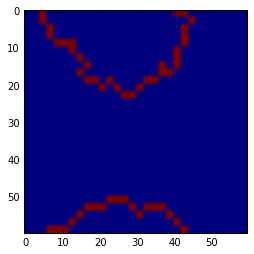

In [10]:
plot_squares(frontier,gameMap.height,gameMap.width)

In [11]:
new_frontier = MyBot.smooth_frontier(frontier,gameMap)

/Users/maximefournes/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


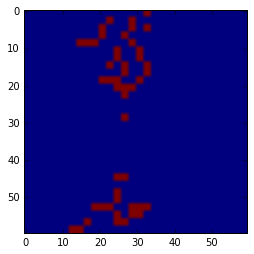

In [12]:
plot_squares(new_frontier,gameMap.height,gameMap.width)

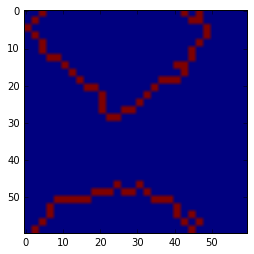

In [14]:
with open('dumps/frontier60.p','rb') as f:
    frontier = pickle.load(f)
plot_squares(frontier,gameMap.height,gameMap.width)

In [15]:
new_frontier = MyBot.smooth_frontier(frontier,gameMap)

/Users/maximefournes/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


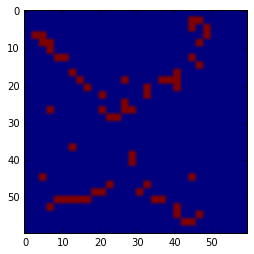

In [16]:
plot_squares(new_frontier,gameMap.height,gameMap.width)

In [6]:
[x/2. for x in range(2,10)]

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

In [3]:
loc = Location(4,4)

In [4]:
[gameMap.getLocation(loc,hd) for hd in HALFCARDINALS]

[loc(4,3),
 loc(5,3),
 loc(5,4),
 loc(5,5),
 loc(4,5),
 loc(3,5),
 loc(3,4),
 loc(3,3)]

In [25]:
def directionDist(d1,d2):
    return abs((d2-d1))%4

In [26]:
def momentumChose(prev,moves):
    return min(moves,key=lambda x:directionDist(x,prev))

In [27]:
momentumChose(2,[4,1,2])

2

In [17]:
l = [(1,2),(1,1),(5,6),(1,2)]

In [18]:
min(l)

(1, 1)

In [29]:
weights = [10,0.8,1.2,1.5,0.8]

In [30]:
min(CARDINALS,key=lambda d:(weights[d],directionDist(d,2)))

1